In [109]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px

In [110]:
#Importing the dataset

df = pd.read_csv("./dataset/WorldHappiness_Corruption_2015_2020.csv")

# look the dataset
df.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


In [111]:
# looking the shape DataSet

print(f"The Shape of Dataset = {df.shape}")

The Shape of Dataset = (792, 13)


In [112]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


In [113]:
#checking null value 

df.isnull().sum()

Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64

In [114]:
#checking duplicated value 

df.duplicated().sum()

0

In [115]:
# looking describe dataset

df.describe().round(2)

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.00,792.00,792.00,792.00,792.00,792.00,792.00,792.00,792.00,792.00,792.00
mean,5.47,0.93,0.50,0.65,0.43,0.21,0.13,1.38,2017.50,0.61,44.33
std,1.12,0.39,0.55,0.23,0.15,0.12,0.11,1.08,1.71,0.64,19.51
min,2.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00,0.00,11.00
25%,4.59,0.64,0.00,0.51,0.33,0.13,0.05,0.00,2016.00,0.00,30.00
50%,5.49,0.99,0.00,0.69,0.44,0.20,0.09,1.73,2017.50,0.18,38.00
75%,6.30,1.23,1.04,0.82,0.55,0.27,0.15,2.24,2019.00,1.27,57.00
max,7.81,2.10,1.61,1.14,0.72,0.84,0.55,3.60,2020.00,1.64,91.00


In [116]:
# check the unique value in column Country

df["Country"].unique()

array(['Norway', 'Denmark', 'Iceland', 'Switzerland', 'Finland',
       'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia',
       'Israel', 'Costa Rica', 'Austria', 'United States', 'Ireland',
       'Germany', 'Belgium', 'Luxembourg', 'United Kingdom', 'Chile',
       'United Arab Emirates', 'Brazil', 'Argentina', 'Mexico',
       'Singapore', 'Malta', 'Guatemala', 'Uruguay', 'Panama', 'France',
       'Thailand', 'Spain', 'Colombia', 'Saudi Arabia', 'Kuwait',
       'Slovakia', 'Bahrain', 'Malaysia', 'Nicaragua', 'Ecuador',
       'El Salvador', 'Poland', 'Uzbekistan', 'Italy', 'Russia', 'Japan',
       'Lithuania', 'Algeria', 'Latvia', 'Moldova', 'Romania', 'Bolivia',
       'Turkmenistan', 'Kazakhstan', 'Slovenia', 'Peru', 'Mauritius',
       'Cyprus', 'Estonia', 'Belarus', 'Libya', 'Turkey', 'Paraguay',
       'Philippines', 'Serbia', 'Jordan', 'Hungary', 'Jamaica', 'Croatia',
       'Kosovo', 'China', 'Pakistan', 'Indonesia', 'Venezuela',
       'Montenegro', 'Morocco

In [117]:
#How many country we have ?
       
print("We have countries  = {} ".format(df["Country"].nunique()))

We have countries  = 132 


Text(0.5, 1.0, 'The average happiness score in 5 years')

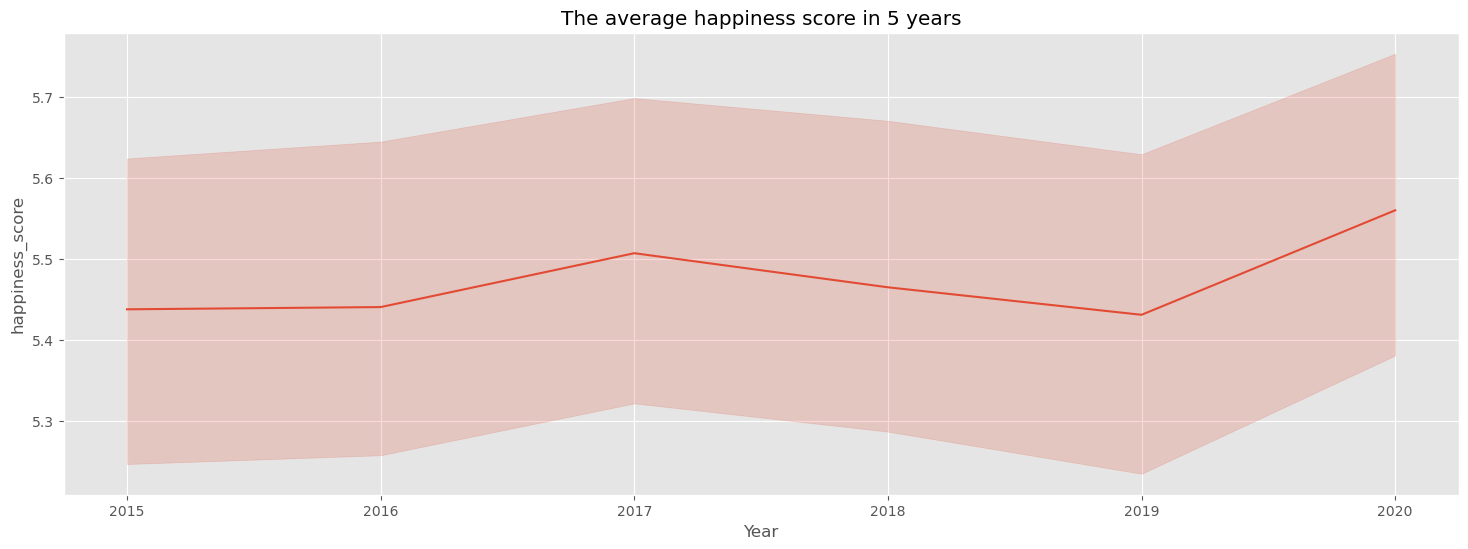

In [118]:
# show the happiness through all years 

plt.figure(figsize=(18,6))
sns.lineplot(data=df, x="Year", y="happiness_score")
plt.title("The average happiness score in 5 years")

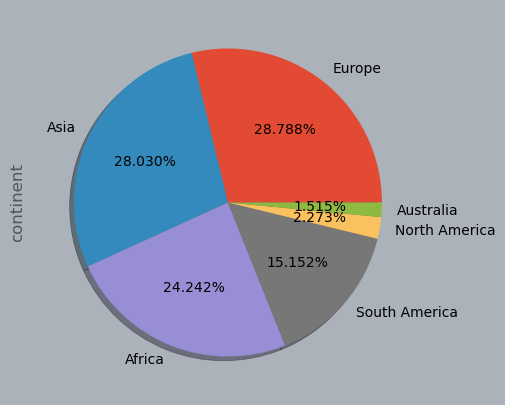

In [119]:
# show the continent 

plt.figure(figsize = [5, 5], clear = True, facecolor = "#ABB2B9")
df["continent"].value_counts().plot.pie(autopct='%1.3f%%', shadow = True);

In [120]:
# create group by in continent

avg_co= df.groupby("continent")["happiness_score"].mean()
avg_co.sort_values()

continent
Africa           4.353944
Asia             5.267553
South America    5.865516
Europe           6.193717
North America    7.000539
Australia        7.289033
Name: happiness_score, dtype: float64

<AxesSubplot:xlabel='continent'>

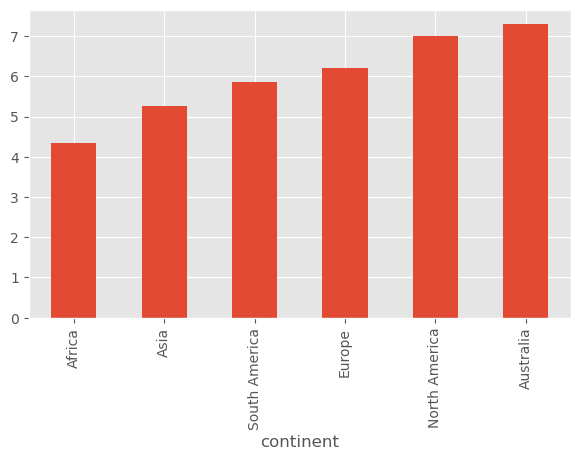

In [121]:
# show the happiness in continent 

avg_co.sort_values().plot(kind="bar", figsize=(7,4))

In [122]:
# active graph # plotly 

px.line(df, x="Year", y="happiness_score", animation_frame="continent")

In [123]:
# creat pivot table

piv_avg = df.pivot_table(index="continent", columns="Year", values="happiness_score")
piv_avg.round(2)

Year,2015,2016,2017,2018,2019,2020
continent,,,,,,
Africa,4.31,4.29,4.43,4.36,4.28,4.47
Asia,5.28,5.26,5.25,5.26,5.26,5.28
Australia,7.30,7.28,7.27,7.30,7.32,7.26
Europe,6.13,6.08,6.29,6.20,6.09,6.38
North America,6.96,7.24,6.92,6.90,7.10,6.88
South America,5.79,5.96,5.84,5.81,5.89,5.90


<AxesSubplot:xlabel='continent'>

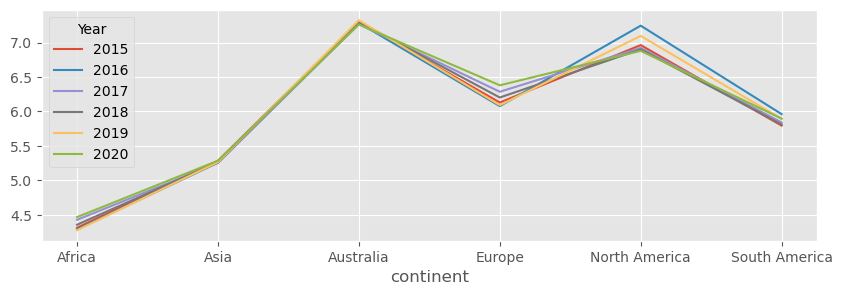

In [124]:
piv_avg.plot(figsize=(10,3))

In [125]:
df['Year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [126]:
# create pivot table based on country

country_avg = df.pivot_table(index="Country", columns="Year", values="happiness_score")
country_avg.sort_values(by=2020, ascending=False)

Year,2015,2016,2017,2018,2019,2020
Country,,,,,,
Finland,7.469,7.406,7.769,7.632,7.413,7.8087
Denmark,7.522,7.527,7.600,7.555,7.526,7.6456
Switzerland,7.494,7.587,7.480,7.487,7.509,7.5599
Iceland,7.504,7.561,7.494,7.495,7.501,7.5045
Norway,7.537,7.522,7.554,7.594,7.498,7.4880
...,...,...,...,...,...,...
Botswana,3.766,4.332,3.488,3.590,3.974,3.4789
Tanzania,3.349,3.781,3.231,3.303,3.666,3.4762
Rwanda,3.471,3.465,3.334,3.408,3.515,3.3123


In [127]:
country_avg = df.pivot_table(index="Country", columns="Year", values="happiness_score")
country_avg.sort_values(by=2019, ascending=False)

Year,2015,2016,2017,2018,2019,2020
Country,,,,,,
Denmark,7.522,7.527,7.600,7.555,7.526,7.6456
Switzerland,7.494,7.587,7.480,7.487,7.509,7.5599
Iceland,7.504,7.561,7.494,7.495,7.501,7.5045
Norway,7.537,7.522,7.554,7.594,7.498,7.4880
Finland,7.469,7.406,7.769,7.632,7.413,7.8087
...,...,...,...,...,...,...
Rwanda,3.471,3.465,3.334,3.408,3.515,3.3123
Benin,3.657,3.340,4.883,4.141,3.484,5.2160
Afghanistan,3.794,3.575,3.203,3.632,3.360,2.5669


In [128]:
country_avg = df.pivot_table(index="Country", columns="Year", values="happiness_score")
country_avg.sort_values(by=2018, ascending=False)

Year,2015,2016,2017,2018,2019,2020
Country,,,,,,
Finland,7.469,7.406,7.769,7.632,7.413,7.8087
Norway,7.537,7.522,7.554,7.594,7.498,7.4880
Denmark,7.522,7.527,7.600,7.555,7.526,7.6456
Iceland,7.504,7.561,7.494,7.495,7.501,7.5045
Switzerland,7.494,7.587,7.480,7.487,7.509,7.5599
...,...,...,...,...,...,...
Liberia,3.533,4.571,3.975,3.495,3.622,4.5579
Rwanda,3.471,3.465,3.334,3.408,3.515,3.3123
Yemen,3.593,4.077,3.380,3.355,3.724,3.5274


In [129]:
country_avg = df.pivot_table(index="Country", columns="Year", values="happiness_score")
country_avg.sort_values(by=2017, ascending=False)

Year,2015,2016,2017,2018,2019,2020
Country,,,,,,
Finland,7.469,7.406,7.769,7.632,7.413,7.8087
Denmark,7.522,7.527,7.600,7.555,7.526,7.6456
Norway,7.537,7.522,7.554,7.594,7.498,7.4880
Iceland,7.504,7.561,7.494,7.495,7.501,7.5045
Netherlands,7.377,7.378,7.488,7.441,7.339,7.4489
...,...,...,...,...,...,...
Malawi,3.970,4.292,3.410,3.587,4.156,3.5380
Yemen,3.593,4.077,3.380,3.355,3.724,3.5274
Rwanda,3.471,3.465,3.334,3.408,3.515,3.3123


In [130]:
country_avg = df.pivot_table(index="Country", columns="Year", values="happiness_score")
country_avg.sort_values(by=2016, ascending=False)

Year,2015,2016,2017,2018,2019,2020
Country,,,,,,
Switzerland,7.494,7.587,7.480,7.487,7.509,7.5599
Iceland,7.504,7.561,7.494,7.495,7.501,7.5045
Denmark,7.522,7.527,7.600,7.555,7.526,7.6456
Norway,7.537,7.522,7.554,7.594,7.498,7.4880
Canada,7.316,7.427,7.278,7.328,7.404,7.2321
...,...,...,...,...,...,...
Afghanistan,3.794,3.575,3.203,3.632,3.360,2.5669
Rwanda,3.471,3.465,3.334,3.408,3.515,3.3123
Benin,3.657,3.340,4.883,4.141,3.484,5.2160


In [131]:
country_avg = df.pivot_table(index="Country", columns="Year", values="happiness_score")
country_avg.sort_values(by=2015, ascending=False)

Year,2015,2016,2017,2018,2019,2020
Country,,,,,,
Norway,7.537,7.522,7.554,7.594,7.498,7.4880
Denmark,7.522,7.527,7.600,7.555,7.526,7.6456
Iceland,7.504,7.561,7.494,7.495,7.501,7.5045
Switzerland,7.494,7.587,7.480,7.487,7.509,7.5599
Finland,7.469,7.406,7.769,7.632,7.413,7.8087
...,...,...,...,...,...,...
Guinea,3.507,3.656,4.534,3.964,3.607,4.9493
Togo,3.495,2.839,4.085,3.999,3.303,4.1872
Rwanda,3.471,3.465,3.334,3.408,3.515,3.3123


================================================================

Less happiness score 😪😪
❌ 2015 > Burundi , Tanzania , Rwanda , Togo , Guinea

❌ 2016 > Togo , Burundi , Benin , Rwanda , Afghanistan

❌ 2017 > Afghanistan , Tanzania , Rwanda , Yemen , Malawi

❌ 2018 > Burundi , Tanzania ,Yemen , Rwanda , Liberia

❌ 2019 > Burundi, Togo , Afghanistan , Benin , Rwanda

❌ 2020 > Afghanistan , Zimbabwe , Rwanda ,Tanzania ,Botswana

High happiness score 😄😄
✔️ 2015 > Finland , Iceland , Denmark ,Norway

✔️ 2016 > Canada , Norway , Denmark , Iceland , Switzerland

✔️ 2017 > Netherlands , Iceland , Norway , Denmark , Finland

✔️ 2018 > Switzerland , Iceland , Denmark , Norway , Finland

✔️ 2019 > Finland , Norway , Iceland , Switzerland , Denmark

✔️ 2020 > Norway , Iceland , Switzerland , Denmark , Finland

================================================================

In [132]:
# now create new table filter by continent 

africa = df[df["continent"] == "Africa"]
asia = df[df["continent"] == "Asia"]
australia = df[df["continent"] == "Australia"]
europe = df[df["continent"] == "Europe"]
north_a = df[df["continent"] == "North America"]
south_a = df[df["continent"] == "South America"]

In [133]:
# create pivot table - africa

africa_p = africa.pivot_table(index="Country",columns="Year",values="happiness_score")
africa_p.sort_values(by=2015)

Year,2015,2016,2017,2018,2019,2020
Country,,,,,,
Burundi,2.905,2.905,3.775,2.905,2.905,3.7753
Tanzania,3.349,3.781,3.231,3.303,3.666,3.4762
Rwanda,3.471,3.465,3.334,3.408,3.515,3.3123
Togo,3.495,2.839,4.085,3.999,3.303,4.1872
Liberia,3.533,4.571,3.975,3.495,3.622,4.5579
Madagascar,3.644,3.681,3.933,3.774,3.695,4.1656
Benin,3.657,3.340,4.883,4.141,3.484,5.2160
Botswana,3.766,4.332,3.488,3.590,3.974,3.4789
Zimbabwe,3.875,4.610,3.663,3.692,4.193,3.2992


In [134]:
# africa_p.plot(figsize=(21,7))
px.line(africa_p)

Africa : In general the average happiness score between 2.9 till 5 less country >Burundi** high country > Algeria**

In [135]:
 # create pivot table - asia

asia_p=asia.pivot_table(index="Country",columns="Year",values="happiness_score")
asia_p.sort_values(by=2015)

Year,2015,2016,2017,2018,2019,2020
Country,,,,,,
Yemen,3.593,4.077,3.380,3.355,3.724,3.5274
Afghanistan,3.794,3.575,3.203,3.632,3.360,2.5669
Cambodia,4.168,3.819,4.700,4.433,3.907,4.8484
Georgia,4.286,4.297,4.519,4.340,4.252,4.6726
India,4.315,4.565,4.015,4.190,4.404,3.5733
Armenia,4.376,4.350,4.559,4.321,4.360,4.6768
Sri Lanka,4.440,4.271,4.366,4.471,4.415,4.3270
Iraq,4.497,4.677,4.437,4.456,4.575,4.7848
Myanmar,4.545,4.307,4.360,4.308,4.395,4.3080


In [136]:
px.line(asia_p)

Asia : in general the average happiness score between 3.5 till 7.2 less country >Yemen** high country > Israel**

In [137]:
# create pivot table - australia

australia_p =australia.pivot_table(index="Country",columns="Year",values="happiness_score")
australia_p.sort_values(by=2015)

Year,2015,2016,2017,2018,2019,2020
Country,,,,,,
Australia,7.284,7.284,7.228,7.272,7.313,7.2228
New Zealand,7.314,7.286,7.307,7.324,7.334,7.2996


In [138]:
px.line(australia_p)

Australia : in general the average happiness score between 7.2 till 7.3 both counrty Australia** and New Zealand**

In [139]:
# create pivot table - europe

europe_p=europe.pivot_table(index="Country",columns="Year",values="happiness_score")
europe_p.sort_values(by=2015)

Year,2015,2016,2017,2018,2019,2020
Country,,,,,,
Ukraine,4.096,4.681,4.332,4.103,4.324,4.5607
Albania,4.644,4.959,4.719,4.586,4.655,4.8827
Bulgaria,4.714,4.218,5.011,4.933,4.217,5.1015
Bosnia and Herzegovina,5.182,4.949,5.386,5.129,5.163,5.6741
Portugal,5.195,5.102,5.693,5.410,5.123,5.9109
Greece,5.227,4.857,5.287,5.358,5.033,5.5150
Montenegro,5.237,5.192,5.523,5.347,5.161,5.5461
Kosovo,5.279,5.589,6.100,5.662,5.401,6.3252
Croatia,5.293,5.759,5.432,5.321,5.488,5.5047


In [140]:
px.line(europe_p)

Europe : in general the average happiness score between 4 till 7.5 less country >Ukraine** high country > Norway and Denmark**

In [141]:
# create pivot table - North America

north_a_p=north_a.pivot_table(index="Country",columns="Year",values="happiness_score")
north_a_p.sort_values(by=2015)

Year,2015,2016,2017,2018,2019,2020
Country,,,,,,
Mexico,6.578,7.187,6.595,6.488,6.778,6.4650
United States,6.993,7.119,6.892,6.886,7.104,6.9396
Canada,7.316,7.427,7.278,7.328,7.404,7.2321


In [142]:
px.line(north_a_p)

North America : in general the average happiness score between 6.4 till 7.4 less country >Mexico** high country > United States and Canada**

In [143]:
# creat pivot table - South America

south_a_p=south_a.pivot_table(index="Country",columns="Year",values="happiness_score")
south_a_p.sort_values(by=2015)

Year,2015,2016,2017,2018,2019,2020
Country,,,,,,
Guinea,3.507,3.656,4.534,3.964,3.607,4.9493
Haiti,3.603,4.518,3.597,3.582,4.028,3.7208
Honduras,5.181,4.788,5.860,5.504,4.871,5.9532
Dominican Republic,5.230,4.885,5.425,5.302,5.155,5.6892
Venezuela,5.250,6.810,4.707,4.806,6.084,5.0532
Jamaica,5.311,5.709,5.890,5.890,5.510,5.8898
Paraguay,5.493,5.878,5.743,5.681,5.538,5.6921
Peru,5.715,5.824,5.697,5.663,5.743,5.7968
Bolivia,5.823,5.890,5.779,5.752,5.822,5.7475


In [144]:
px.line(south_a_p)

South America : in general the average happiness score between 3.5 till 7.3 less country >Guinea** high country > Costa Rica**

Analysis Results 💥🙌

The Shape DataSet = (792, 13)

No duplicate value in DateSet

No missing value in DateSet

We have 792 Rows and 13 Columns

We have countries = 132

Continent-- Avg happiness score

Africa --> 4.35

Asia --> 5.26

South America --> 5.86

Europe --> 6.19

North America --> 7

Australia --> 7.28

We see the highest continent to lowest continent ( Happy ) 1- Australia 2- North America 3- Europe 4- South America 5- Asia 6- Afica

All continent don`t has more different in happiness in 5 years but the North America in 2016 had increase score but then in decreasing**

Less happiness score 😪
​
😪 2015 > Burundi , Tanzania , Rwanda , Togo , Guinea​

😪 2016 > Togo , Burundi , Benin , Rwanda , Afghanistan​

😪 2017 > Afghanistan , Tanzania , Rwanda , Yemen , Malawi​

😪 2018 > Burundi , Tanzania ,Yemen , Rwanda , Liberia
​
😪 2019 > Burundi, Togo , Afghanistan , Benin , Rwanda
​
😪 2020 > Afghanistan , Zimbabwe , Rwanda ,Tanzania ,Botswana​
High happiness score 😄

😄 2015 > Finland , Iceland , Denmark ,Norway
​
😄 2016 > Canada , Norway , Denmark , Iceland , Switzerland
​
😄 2017 > Netherlands , Iceland , Norway , Denmark , Finland​

😄 2018 > Switzerland , Iceland , Denmark , Norway , Finland​

😄 2019 > Finland , Norway , Iceland , Switzerland , Denmark​

😄 2020 > Norway , Iceland , Switzerland , Denmark , Finland

✔️ Africa : in general the average happiness score between 2.9 till 5 less country >Burundi high country > Algeria

✔️ Asia : in general the average happiness score between 3.5 till 7.2 less country >Yemen high country > Israel

✔️ Australia : in general the average happiness score between 7.2 till 7.3 both counrty Australia and New Zealand

✔️ Europe : in general the average happiness score between 4 till 7.5 less country >Ukraine high country > Norway and Denmark

✔️ North America : in general the average happiness score between 6.4 till 7.4 less country >Mexico high country > United States and Canada

✔️ South America : in general the average happiness score between 3.5 till 7.3 less country >Guinea high country > Costa Rica